In [1]:
import networkx as nx

In [2]:
import requests

In [3]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib import cm


In [8]:
protein_list = ['ANOS1','APP','CALR','CD22','CEL','EGFL7','ENPP1','EPPIN','EPPIN-WFDC6','ERP44','FOLR1','FOLR2','FZD9','KRT4','MMP16','MSN','NLGN1','NLGN2','NLGN3','NLGN4X','NOTCH1','NOTCH2','NOTCH3','PCSK6','PDIA3','PDIA4','PTPRJ','ROBO1','SFRP1','TEK','WNT3A','WNT4']

In [9]:
proteins='%0D'.join(protein_list)

In [10]:
url = 'https://string-db.org/api/tsv/network?identifiers='+ proteins + '&species=9606'

In [11]:
r= requests.get(url)

In [12]:
lines = r.text.split("\n") #pulls the test from response object and split 

In [13]:
data=[l.split('\t') for l in lines] # splits each lineinto components

In [14]:
# change to dataframe - use first row as column names


In [15]:
df= pd.DataFrame(data[1:-1], columns= data[0])

In [16]:
#dataframe with prefered names of the two proteins and the score of the interaction

In [17]:
interactions = df[['preferredName_A', 'preferredName_B', 'score']]

In [20]:
G=nx.Graph(name='Protein Interaction Graph')

In [21]:
interactions = np.array(interactions)

In [24]:
for i in range(len(interactions)):
    interaction = interactions[i]
    a=interaction[0] #protein a node
    b=interaction[1] #protein b node
    w=float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)])# add weighted edge to graph

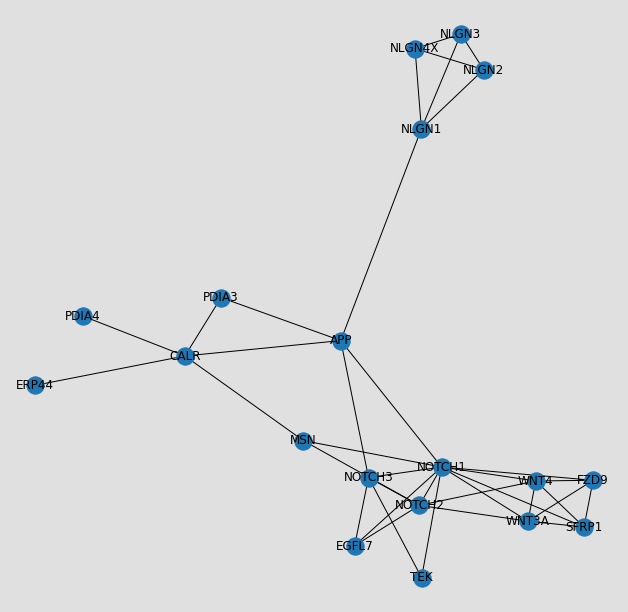

In [27]:
pos=nx.spring_layout(G)# position the nodes using the spring layout
plt.figure(figsize=(11,11), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [28]:
nx.info(G)

'Name: Protein Interaction Graph\nType: Graph\nNumber of nodes: 19\nNumber of edges: 37\nAverage degree:   3.8947'